In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings


#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/900yr/27000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [110]:
# Functions for Meridional Sections

def plot_salt_section(dataset, lon, z, case_name):
    t = np.linspace(33, 37, 11, endpoint=True)
    b = np.linspace(33, 37, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'),
                     b, cmap='BrBG_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_temp_section(dataset, lon, z, case_name):
    t = np.linspace(0, 28, 11, endpoint=True)
    b = np.linspace(0, 28, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='coolwarm', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def calc_sigma_wright(salt, temp, press=2000):
    '''Wright EOS density calculation. Default reference pressure is 2000db, but can be set to any pressure.'''

    p = press*10000
    
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    alpha_0 = a0 + a1*temp + a2*salt
    p_0 = b0 + b1*temp + b2*temp**2 + b3*temp**3 + b4*salt + b5*salt*temp
    lam = c0 + c1*temp + c2*temp**2 + c3*temp**3 + c4*salt + c5*salt*temp

    sigma = (p+p_0)/(lam + alpha_0*(p+p_0))
    
    sigma_xarray = temp.copy()
    sigma_xarray.attrs['units'] = 'kg/m^3' 
    sigma_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma_xarray.attrs['standard_name'] = 'sigma'
    sigma_xarray.values = sigma
    
    return sigma_xarray
#     return sigma


def plot_density_section(dataset, lon, z, case_name):
    t = np.linspace(1030, 1037, 11, endpoint=True)
    b = np.linspace(1030, 1037, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])

    density = calc_sigma_wright(dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='BuPu', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_u_section(dataset, lon, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.uo.sel(xq=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Zonal Velocity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_v_section(dataset, lon, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.yq, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.vo.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Meridional Velocity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return


# Functions for Zonal Sections

def plot_salt_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(33, 37, 11, endpoint=True)
    b = np.linspace(33, 37, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'),
                     b, cmap='BrBG_r', extend='both')
    ax.invert_yaxis()
#     ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_temp_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(0, 28, 11, endpoint=True)
    b = np.linspace(0, 28, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='coolwarm', extend='both')
    ax.invert_yaxis()
#     ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_density_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(1030, 1037, 11, endpoint=True)
    b = np.linspace(1030, 1037, 21, endpoint=True)

    density = calc_sigma_wright(dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='BuPu', extend='both')
    ax.invert_yaxis()
#     ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_u_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.xq, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.uo.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
#     ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Zonal Velocity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_v_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)
#     lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.vo.sel(yq=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
#     ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Meridional Velocity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(basin, lon))
    plt.show()
    return


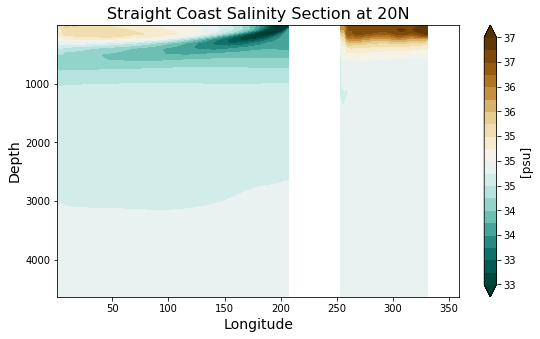

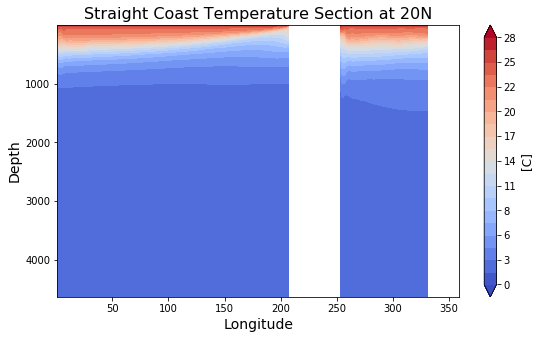

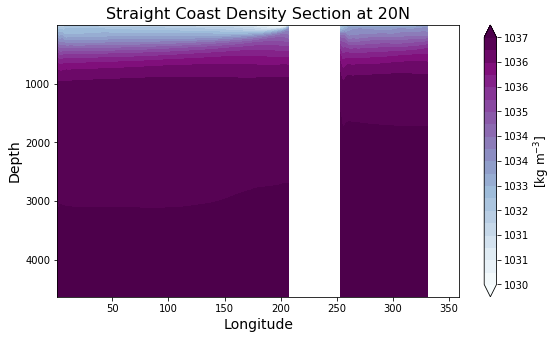

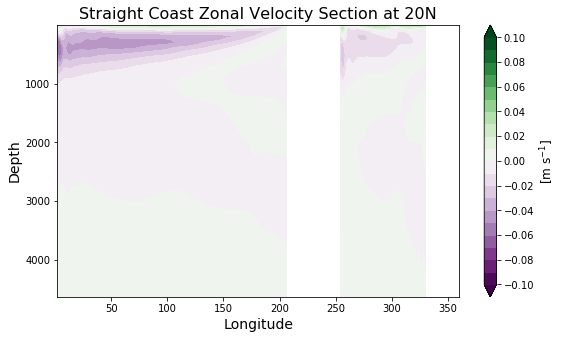

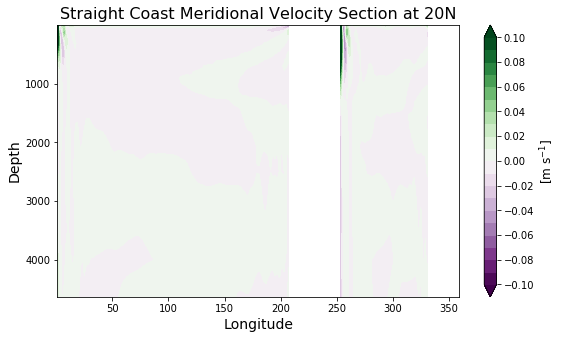

In [111]:
plot_salt_section_zonal(dy_straight, 20, 5000, case_straight)
plot_temp_section_zonal(dy_straight, 20, 5000, case_straight)
plot_density_section_zonal(dy_straight, 20, 5000, case_straight)
plot_u_section_zonal(dy_straight, 20, 5000, case_straight)
plot_v_section_zonal(dy_straight, 20, 5000, case_straight)


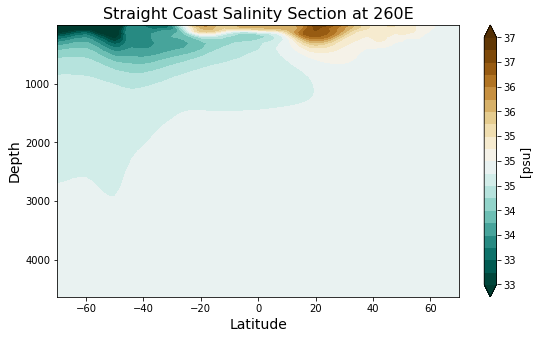

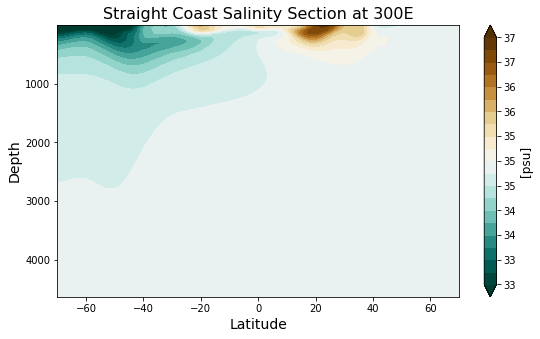

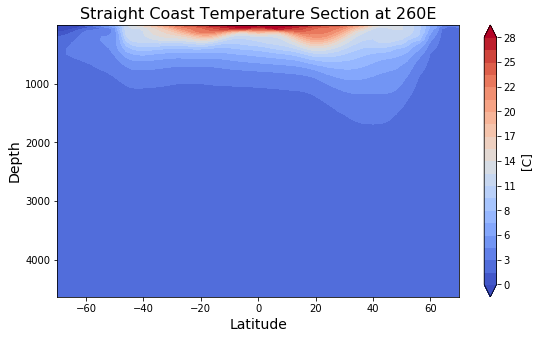

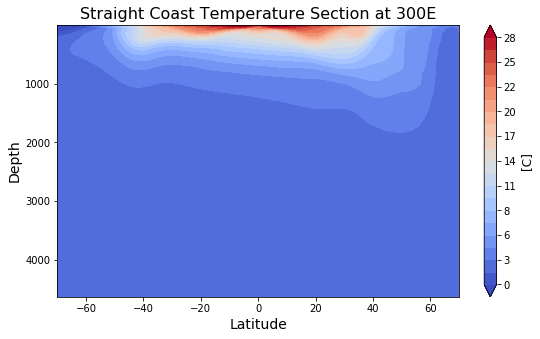

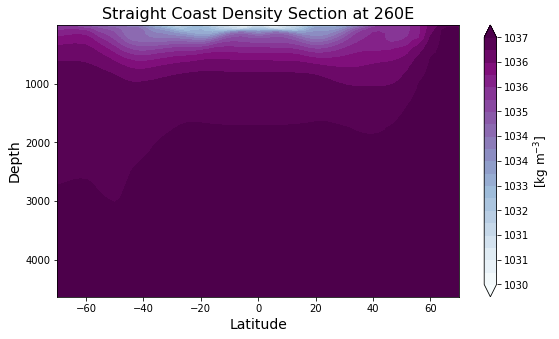

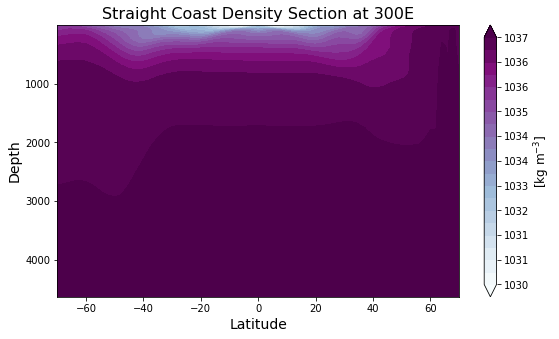

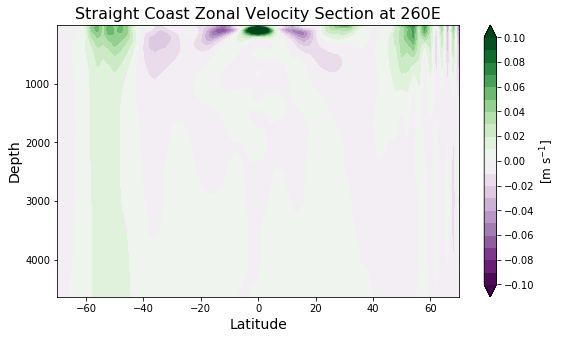

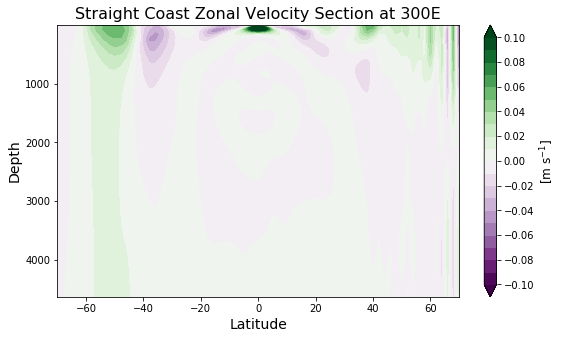

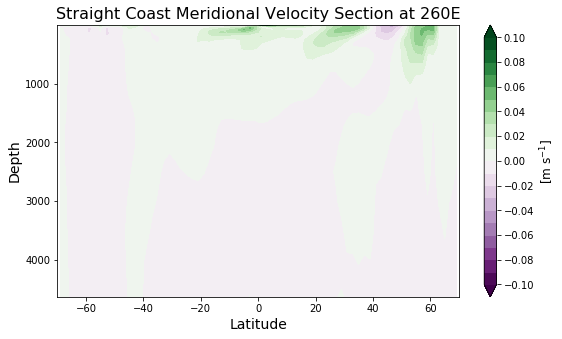

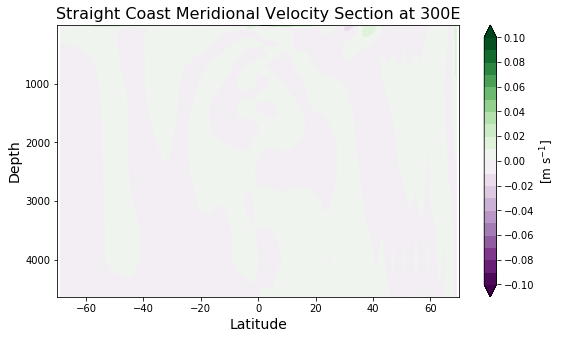

In [112]:
plot_salt_section(dy_straight, 260, 5000, case_straight)
# plot_salt_section(dy_straight, 280, 5000, case_straight)
plot_salt_section(dy_straight, 300, 5000, case_straight)
# plot_salt_section(dy_straight, 320, 5000, case_straight)

plot_temp_section(dy_straight, 260, 5000, case_straight)
# plot_temp_section(dy_straight, 280, 5000, case_straight)
plot_temp_section(dy_straight, 300, 5000, case_straight)
# plot_temp_section(dy_straight, 320, 5000, case_straight)

plot_density_section(dy_straight, 260, 5000, case_straight)
plot_density_section(dy_straight, 300, 5000, case_straight)

plot_u_section(dy_straight, 260, 5000, case_straight)
plot_u_section(dy_straight, 300, 5000, case_straight)

plot_v_section(dy_straight, 260, 5000, case_straight)
plot_v_section(dy_straight, 300, 5000, case_straight)



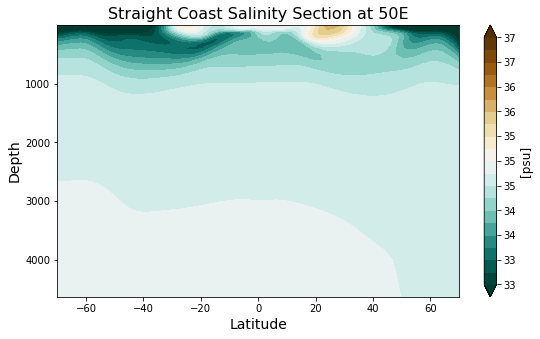

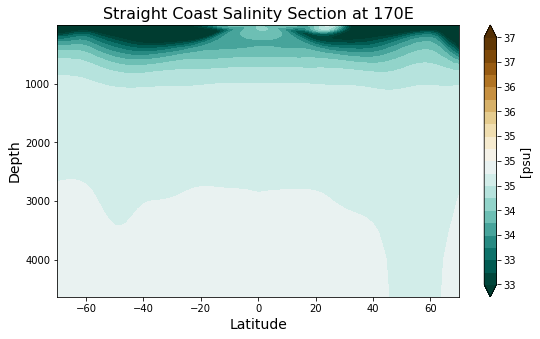

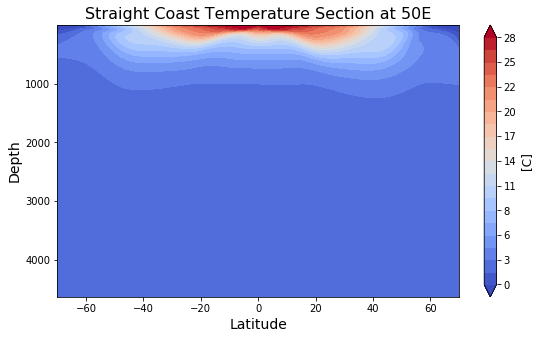

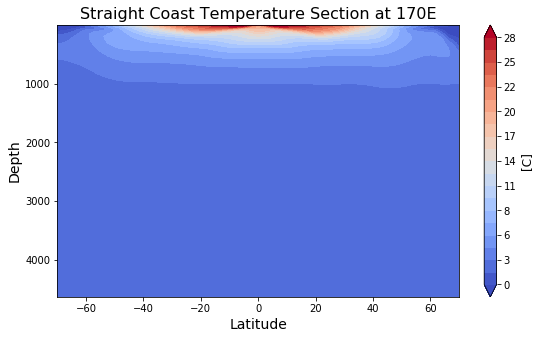

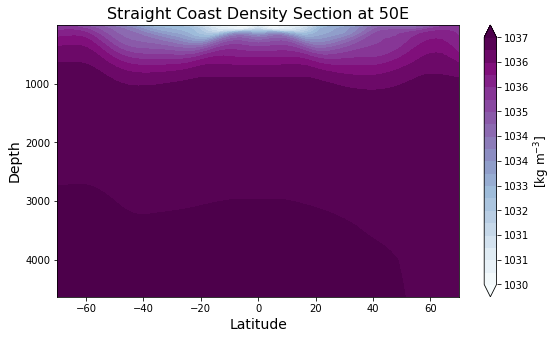

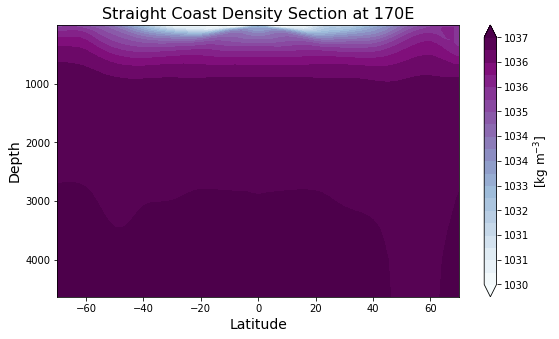

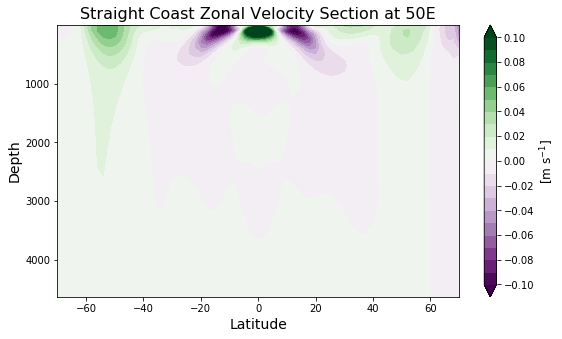

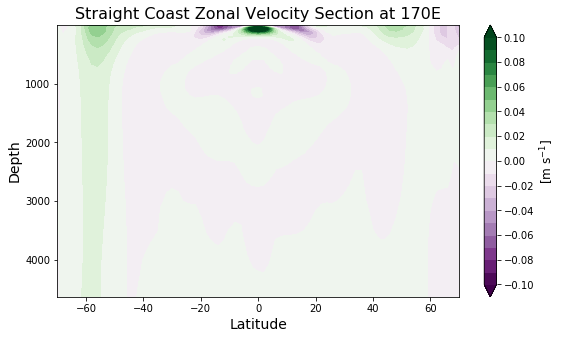

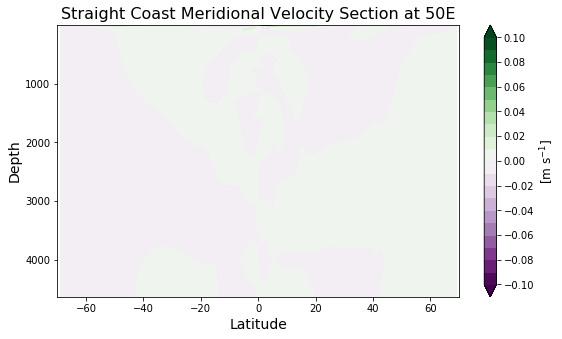

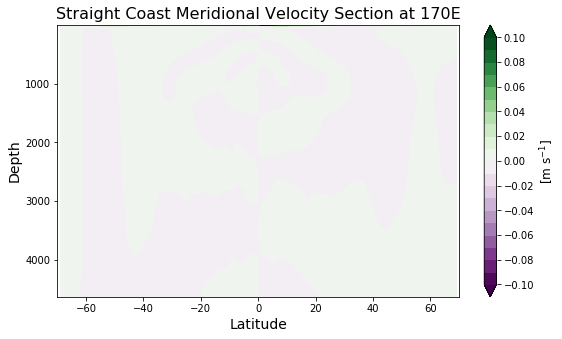

In [114]:
# plot_salt_section(dy_straight, 10, 5000, case_straight)
plot_salt_section(dy_straight, 50, 5000, case_straight)
# plot_salt_section(dy_straight, 90, 5000, case_straight)
# plot_salt_section(dy_straight, 130, 5000, case_straight)
plot_salt_section(dy_straight, 170, 5000, case_straight)

# plot_temp_section(dy_straight, 10, 5000, case_straight)
plot_temp_section(dy_straight, 50, 5000, case_straight)
# plot_temp_section(dy_straight, 90, 5000, case_straight)
# plot_temp_section(dy_straight, 130, 5000, case_straight)
plot_temp_section(dy_straight, 170, 5000, case_straight)

plot_density_section(dy_straight, 50, 5000, case_straight)
plot_density_section(dy_straight, 170, 5000, case_straight)

plot_u_section(dy_straight, 50, 5000, case_straight)
plot_u_section(dy_straight, 170, 5000, case_straight)

plot_v_section(dy_straight, 50, 5000, case_straight)
plot_v_section(dy_straight, 170, 5000, case_straight)


<xarray.Dataset>
Dimensions:         (nv: 2, time: 100, xh: 180, xq: 180, yh: 81, yq: 81, zl: 31)
Coordinates:
  * xh              (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * yh              (yh) float64 -80.0 -78.0 -76.0 -74.0 ... 74.0 76.0 78.0 80.0
  * time            (time) object 2700-07-02 12:00:00 ... 2799-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
  * zl              (zl) float64 2.5 10.0 20.0 32.5 ... 3.5e+03 4e+03 4.625e+03
  * xq              (xq) float64 2.0 4.0 6.0 8.0 ... 354.0 356.0 358.0 360.0
  * yq              (yq) float64 -79.0 -77.0 -75.0 -73.0 ... 75.0 77.0 79.0 81.0
Data variables:
    pbo             (time, yh, xh) float32 ...
    pso             (time, yh, xh) float32 ...
    masscello       (time, zl, yh, xh) float32 ...
    thkcello        (time, zl, yh, xh) float32 ...
    zos             (time, yh, xh) float32 ...
    zossq           (time, yh, xh) float32 ...
    thetao          (time, zl, yh, xh) float32 ...
    tos             (time, yh, xh) float32 ...
    Sh_tendency_2d  (time, yh, xh) float32 ...
    tossq           (time, yh, xh) float32 ...
    tob             (time, yh, xh) float32 ...
    so              (time, zl, yh, xh) float32 ...
    sos             (time, yh, xh) float32 ...
    sossq           (time, yh, xh) float32 ...
    sob             (time, yh, xh) float32 ...
    mlotst          (time, yh, xh) float32 ...
    mlotstsq        (time, yh, xh) float32 ...
    mlotstmin       (time, yh, xh) float32 ...
    mlotstmax       (time, yh, xh) float32 ...
    uo              (time, zl, yh, xq) float32 ...
    vo              (time, zl, yq, xh) float32 ...
    uhml            (time, zl, yh, xq) float32 ...
    vhml            (time, zl, yq, xh) float32 ...
    average_T1      (time) object ...
    average_T2      (time) object ...
    average_DT      (time) timedelta64[ns] ...
    time_bnds       (time, nv) timedelta64[ns] ...
Attributes:
    filename:          27000101.ocean_annual.nc
    title:             Aquaplanet
    associated_files:  areacello: 27000101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A